## Neural Networks

Deep Learning is based on artificial neural networks which have been around in some form since the late 1950s. The networks are built from individual parts approximating neurons, typically called units or simply "neurons." Each unit has some number of weighted inputs. These weighted inputs are summed together (a linear combination) then passed through an activation function to get the unit's output.

<img src="simple_neuron.png" width=400px>

Mathematically this looks like: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
## Some basic setup
torch.manual_seed(7) # for predictable reproduction

# initial tensors
samples = torch.randn((1,3))

# define the size of each layer in the network
n_input = samples.shape[1]
n_hidden_nodes = 2
n_output = 1

# weights for each node
W1 = torch.randn((n_input, n_hidden_nodes))
W2 = torch.randn((n_hidden_nodes, n_output))

# for bias terms
B1 = torch.randn((1, n_hidden_nodes))
B2 = torch.randn((1, n_output))

In [3]:
def sigmoid_activation(x):
    return 1/(1+torch.exp(-x))

In [4]:
h = sigmoid_activation(torch.mm(samples, W1) + B1)
output = sigmoid_activation(torch.mm(h, W2) + B2)
output

tensor([[0.3171]])

In [5]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, 
                          train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, 
                                          shuffle=True)

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


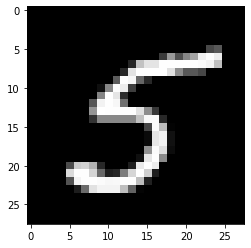

In [34]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

In [36]:
def softmax_activation(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

In [42]:
inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
b1 = torch.randn(1, 256)

w2 = torch.randn(256, 10)
b2 = torch.randn(1, 10)

h = sigmoid_activation(torch.mm(inputs, w1) + b1)
out = softmax_activation(torch.mm(h, w2) + b2)
print(out.shape)
print(out.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [38]:
import numpy as np

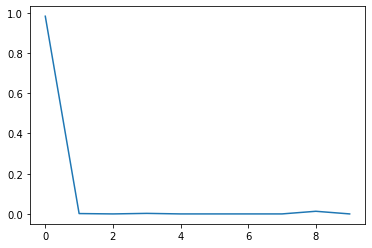

In [39]:
plt.plot(out[0])

In [46]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc1 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        
        return x
        

In [47]:
model = Network()
model

Network(
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [57]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)

loss = criterion(logps, labels)
print(loss)

tensor(2.3286, grad_fn=<NllLossBackward>)


In [58]:
# use autograd to keep track of the gradients

In [60]:
x = torch.randn((2,2), requires_grad=True)
x

tensor([[-0.0380,  0.8002],
        [-0.7232,  0.0398]], requires_grad=True)

In [61]:
y = x**2
y

tensor([[0.0014, 0.6404],
        [0.5230, 0.0016]], grad_fn=<PowBackward0>)

In [62]:
y.grad_fn

In [63]:
z = y.mean()
z.grad_fn

In [64]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.0190,  0.4001],
        [-0.3616,  0.0199]])
tensor([[-0.0190,  0.4001],
        [-0.3616,  0.0199]], grad_fn=<DivBackward0>)


In [74]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [75]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)


Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024],
        [ 0.0064,  0.0064,  0.0064,  ...,  0.0064,  0.0064,  0.0064],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        ...,
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014]])


In [76]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [77]:
# Take an update step and few the new weights
print(model[0].weight)
optimizer.step()
print('Updated weights - ', model[0].weight)

Parameter containing:
tensor([[-0.0345,  0.0099,  0.0014,  ..., -0.0006,  0.0284, -0.0179],
        [ 0.0112, -0.0298, -0.0125,  ..., -0.0253,  0.0016,  0.0013],
        [ 0.0139, -0.0312,  0.0318,  ...,  0.0245, -0.0331, -0.0224],
        ...,
        [ 0.0295, -0.0129,  0.0079,  ...,  0.0255, -0.0331, -0.0113],
        [ 0.0046, -0.0217, -0.0168,  ..., -0.0152, -0.0095,  0.0288],
        [-0.0349, -0.0036,  0.0113,  ..., -0.0036,  0.0026,  0.0151]],
       requires_grad=True)
Updated weights -  Parameter containing:
tensor([[-0.0345,  0.0099,  0.0014,  ..., -0.0006,  0.0284, -0.0179],
        [ 0.0111, -0.0299, -0.0126,  ..., -0.0254,  0.0015,  0.0012],
        [ 0.0139, -0.0312,  0.0318,  ...,  0.0246, -0.0331, -0.0224],
        ...,
        [ 0.0296, -0.0129,  0.0079,  ...,  0.0255, -0.0331, -0.0113],
        [ 0.0047, -0.0217, -0.0167,  ..., -0.0151, -0.0095,  0.0288],
        [-0.0349, -0.0035,  0.0113,  ..., -0.0036,  0.0026,  0.0151]],
       requires_grad=True)


In [78]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8307572098683194
Training loss: 0.7945470534153839
Training loss: 0.5104513994094405
Training loss: 0.42440048706874667
Training loss: 0.38281119309826445


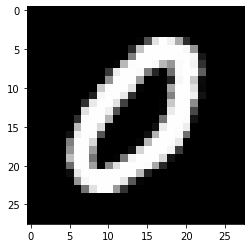

In [100]:
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[1].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [101]:
x = ps.numpy()
x

array([[9.8892772e-01, 3.1382537e-09, 1.4140113e-04, 7.3148993e-05,
        8.4981748e-06, 1.0142033e-02, 1.5062290e-05, 8.9596244e-05,
        7.2598370e-05, 5.3002400e-04]], dtype=float32)

<BarContainer object of 10 artists>

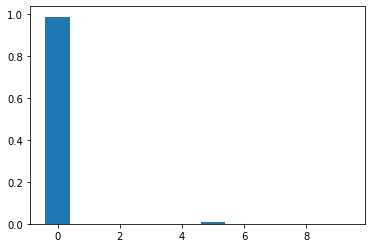

In [102]:
plt.bar(range(10), x[0])